<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 35</h1>
</div>

# 1. Binary search

# 2. Greedy algorithms (MST)

# 3. Divide and conquer

## Attendance: https://piazza.com/class/lrat4tm83gbnz

# <font color="red">1. Binary search</font>

# 2. Greedy algorithms (MST)

# 3. Divide and conquer

## Binary search

**Input:** sorted array/vector `v`

**Task:** find if a specific element `x` appears in it

General strategy:
* maintain range `left..right` within `v` of where `x` could be
* repeat:
   * ask about the middle of the range
   * if `x` found, celebrate
   * if the middle element${}<{}$`x`, narrow search to the right half
   * otherwise, narrow search to the left half

## Let's implement it!

**Might be harder than you think!**

Jon Bentley in "Programming pearls" claims that only 10% programmers succeed, even given unlimited amount of time

**Ad:**
 * Great book if you are interested in programming and basic algorithms
 * First edition mostly uses pseudocode
 * 2nd edition focused on C++ (probably still great)
 * very cheap if you want to buy second hand (< \$10)
 

## Let's implement it!

In [23]:
fn present(mut data:&[i32], element:i32) -> Option<(usize,i32)> {
    let (mut left, mut right) = (0, data.len());
    // invariant: if element has not been found, it must be in data[left..right]
    while left < right {
        let middle = (left+right)/2;
        if data[middle] == element {
            return Some((middle, element));
        } else if data[middle] > element {
            right = middle - 1 
        } else {
            left = middle + 1
        }
    }
    None
}

In [24]:
let v = vec![-16,-4,0,2,4,12,32,48,48,111];

In [25]:
present(&v, 111)

Some((9, 111))

In [26]:
present(&v, 5)

None

In [27]:
present(&v, 1000)

None

In [28]:
present(&v, 32)

Some((6, 32))

# 1. Binary search

# <font color="red">2. Greedy algorithms (MST)</font>

# 3. Divide and conquer

## Greedy algorithms

* Make locally best (or any) decision towards solving a problem

### Examples we saw

* Heuristics for creating decision trees
  * select "best" single split and recurse

* Shortest paths (Dijkstra's algorithm)
  * select the vertex known to be closest
  * try routing paths through it
  * **Gives globally optimal solution!!!**

## Additional examples

* Minimum spanning tree: find cheapest overall subset of edges so that the graph is connected
  
  * Kruskal's algorithm: keep adding the cheapest edge that connects disconnected groups vertices
  * Complexity $O(E*log(E))
  
### Why is MST useful?

* Connecting N locations with fiber
* Traveling salesman

In [29]:
type Vertex = usize;
type Distance = usize;
type Edge = (Vertex, Vertex, Distance);

#[derive(Debug,Copy,Clone)]
struct Outedge {
    vertex: Vertex,
    length: Distance,
}

type AdjacencyList = Vec<Outedge>;

#[derive(Debug)]
struct Graph {
    n: usize,
    outedges: Vec<Edge>,
    parent: Vec<Vertex>,
    rank: Vec<usize>,
}

impl Graph {
    fn create_undirected(n:usize,outedges:Vec<Edge>) -> Graph {
        let parent: Vec<Vertex> = vec![];
        let rank: Vec<usize> = vec![];
        let mut g = Graph{n,outedges,parent,rank};
        g.outedges.sort_by(|a, b| a.2.cmp(&b.2));
        for node in 0..g.n {
            g.parent.push(node);
            g.rank.push(0);
        }
        g
    }
    
    fn find(&mut self, i:Vertex) -> Vertex {
        if self.parent[i] != i {
            self.parent[i] = self.find(self.parent[i]);
        }
        return self.parent[i];
    }

    fn union(&mut self, i:Vertex, j:Vertex) {
        if self.rank[i] < self.rank[j] {
            self.parent[i] = j;
        } else if self.rank[i] > self.rank[j] {
            self.parent[j] = i;
        } else {
            self.parent[j] = i;
            self.rank[i] += 1;
        }
    }
}

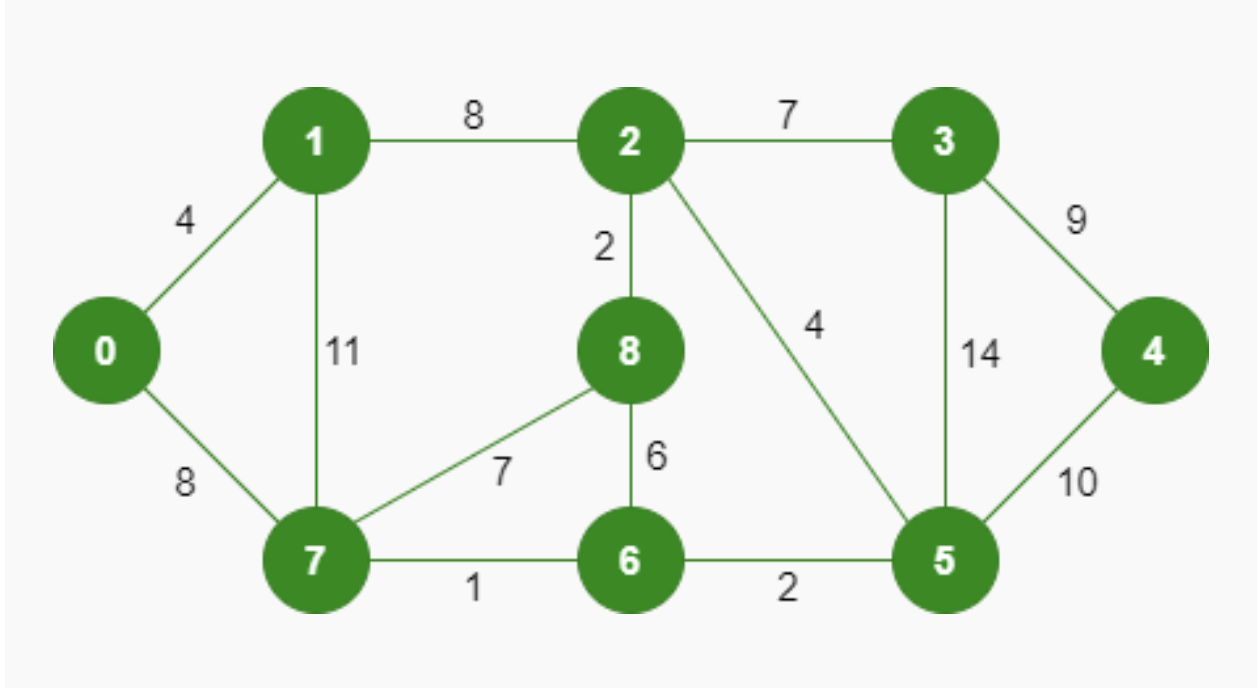

In [30]:
// Let's create the graph
let n = 9;
let edges: Vec<Edge> = vec![(7,6,1),(8,2,2),(6,5,2),(0,1,4),(2,5,4),(8,6,6),(2,3,7),(7,8,7),(0,7,8),(1,2,8),(3,4,9),(5,4,10),(1,7,11),(3,5,14)];
let mut g = Graph::create_undirected(n, edges);
g

Graph { n: 9, outedges: [(7, 6, 1), (8, 2, 2), (6, 5, 2), (0, 1, 4), (2, 5, 4), (8, 6, 6), (2, 3, 7), (7, 8, 7), (0, 7, 8), (1, 2, 8), (3, 4, 9), (5, 4, 10), (1, 7, 11), (3, 5, 14)], parent: [0, 1, 2, 3, 4, 5, 6, 7, 8], rank: [0, 0, 0, 0, 0, 0, 0, 0, 0] }

In [31]:
impl Graph {
    fn KruskalMST(&mut self) -> Vec<Edge> {
        let mut result: Vec<Edge> = vec![];
        let mut num_mst_e = 0;
        let mut next_edge = 0;
        while num_mst_e < self.n - 1 {
            let (u,v,w) = self.outedges[next_edge];
            next_edge = next_edge + 1;
            let x = self.find(u);
            let y = self.find(v);
            if x != y {
                num_mst_e += 1;
                result.push((u,v,w));
                self.union(x,y);
            }
        }
        result
    }
}

Error: duplicate definitions with name `KruskalMST`

In [32]:
let result = g.KruskalMST();
let mut min_cost = 0;
for (u,v,w) in result {
    min_cost += w;
    println!("{} -- {} == {}", u, v, w)
}
println!("Spanning Tree Cost {}", min_cost);

7 -- 6 == 1
8 -- 2 == 2
6 -- 5 == 2
0 -- 1 == 4
2 -- 5 == 4
2 -- 3 == 7
0 -- 7 == 8
3 -- 4 == 9
Spanning Tree Cost 37


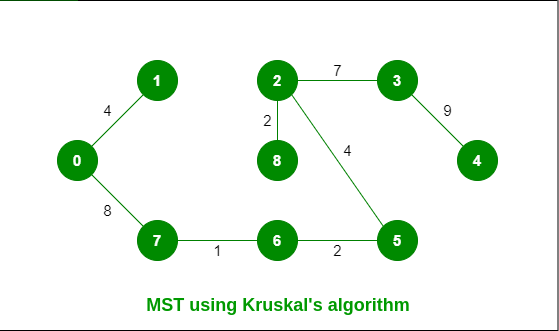

### Other interesting graph problems (independent reading if you are interested)
* Matching: matching conference attendees to available desserts they like
  * Another formulation: maximum size set of independent edges in graph
  * Keep adding edges as long as you can
  * This will give factor 2 approximation

# 1. Binary search in a sorted vector
# 2. Greedy algorithms (MST)
# <font color="red">3. Divide and conquer</font>


## Divide and conquer

If your problem is too difficult:

* partition it into subproblems
* solve the subproblems
* combine their solutions into a solution to the entire problem

**Our plan:** see two classic divide and conquer sorting algorithms

<br>
<div align="center">
    <b>How would you do this?</b>
</div>

## Merge Sort

Recursively:
  * sort the first half
  * sort the second half
  * merge the results

<div align="center">
    <b>Complexity for $n$ elements?</b>
</div>

* Merging two lists of $Q$ and $R$ elements takes $O(R+Q)$ time
* $O(\log n)$ levels of recursion: $O(n)$ work on each level
* $O(n \log n)$ time overall

BUT
* Difficult to do in-place (requires extra memory allocations for intermediate results)

## Implementing merging

In [33]:
fn merge(v1:Vec<i32>, v2:Vec<i32>) -> Vec<i32> {
    let (l1,l2) = (v1.len(), v2.len());
    let mut merged = Vec::with_capacity(l1+l2);
    let (mut i1, mut i2) = (0,0);
    while i1 < l1 {
        if (i2 == l2) || (v1[i1] <= v2[i2]) {
            merged.push(v1[i1]);
            i1 += 1;
        } else {
            merged.push(v2[i2]);
            i2 += 1;
        }
    }
    while i2 < l2 {
        merged.push(v2[i2]);
        i2 += 1;
    }
    merged
}

In [34]:
let v1 = vec![3,4,8,11,12];
let v2 = vec![1,2,3,9,22];
merge(v1,v2)

[1, 2, 3, 3, 4, 8, 9, 11, 12, 22]

## Implementing Merge Sort

In [35]:
fn merge_sort(input:&[i32]) -> Vec<i32> {
    if input.len() <= 1 {
        input.to_vec()
    } else {
        let split = input.len() / 2;
        let v1 = merge_sort(&input[..split]);
        let v2 = merge_sort(&input[split..]);
        merge(v1,v2)
    }
}

In [36]:
let v = vec![2,4,21,6,2,32,62,0,-2,8];
merge_sort(&v)

[-2, 0, 2, 2, 4, 6, 8, 21, 32, 62]

## Quick Sort

* Select an arbitrary (random?) element $x$
* Partition your vector:
  * Move elements lower than $x$ to the left
  * Move elements greater than $x$ to the right
* Sort the left part and right part

<div align="center">
    <b>Complexity for $n$ elements?</b>
</div>

* Partitioning $k$ elements takes $O(k)$ time
* Intuition: The size of the problem usually decreases by constant factor in a recursive call
* Expected time: $O(n \log n)$ time overall but $O(n^2)$ worst case when the array is already sorted in regular or reverse order.

## Implementing partitioning

In [17]:
fn partition(input:&mut [i32], pivot: i32) -> (usize,usize) {
    // move numbers lower than pivot to the left
    let mut left = 0;
    for i in 0..input.len() {
        if input[i] < pivot {
            input.swap(i,left);
            left += 1;
        }
    }
    // input[..left]: numbers lower than pivot

    // move numbers greater than pivot to the right
    let mut right = input.len();
    for i in (left..input.len()).rev() {
        if input[i] > pivot {
            right -= 1;
            input.swap(i,right);
        }
    }
    // input[right..]: numbers greater than pivot
    
    (left,right)
}

## Implementing QuickSort

In [20]:
:dep rand
use rand::Rng;

fn quicksort(input:&mut [i32]) {
    if input.len() >= 2 {    
        // pivot = random element from the input
        let pivot = input[rand::thread_rng().gen_range(0..input.len())];
        let (left,right) = partition(input,pivot);
        println!("\nL {} R {} P {} P {}", left, right, pivot, input[left]);
        
        println!("Left side {:?}", &input[..left]);
        println!("Right side {:?}", &input[right..]);
        quicksort(&mut input[..left]);
        quicksort(&mut input[right..]);
    }
}

In [21]:
let mut q = vec![145,12,3,7,83,12,8,64];
quicksort(&mut q);
println!("{:?}", q);


L 1 R 2 P 7 P 7
Left side [3]
Right side [12, 145, 83, 12, 8, 64]

L 5 R 6 P 145 P 145
Left side [12, 83, 12, 8, 64]
Right side []

L 1 R 3 P 12 P 12
Left side [8]
Right side [83, 64]

L 0 R 1 P 64 P 64
Left side []
Right side [83]
[3, 7, 8, 12, 12, 64, 83, 145]
